In [7]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn2_circles


In [38]:
hATAC = pd.read_csv('data/hATAC_Dec_05_22.csv', index_col=0)
hATAC.columns = ['CHROM', 'FROM','TO','ID']
mATAC = pd.read_csv('data/mm10_hg38_cm_result.csv', index_col=0)
mATAC.columns = ['CHROM', 'FROM','TO', 'start_idx','end_idx','ID','length']
mATAC_hATAC = pd.read_excel('data/mATAC_hATAC_Dec_12_22.xlsx', index_col=0, engine='openpyxl')


# Interval analysis
The following notebook analyse the gnomical intervals which were obtained with ATAC expiremint. one on human cells (hATAC) and other on mouse (mATAC). <br>


Table of content :
- common intervals-<br> Check how many unique and common interval the ATAC seq of each experiment outputed
- length analysis- <br> Analyse how many common and unique basepair each expriment have

## pre-procesing the data

In [44]:
only_human = hATAC[~hATAC.ID.isin(HATAC_MATAC.hATAC_id)] # df with interval exist only in human 
only_mouse = mATAC[~mATAC.ID.isin(HATAC_MATAC.mATAC_id)] # same but mouse

func = lambda row : pd.Series({'CHROM':'chr' + row.chrom,
                              'FROM':max([row.hATAC_start, row.mATAC_start]),
                              'TO' :min([row.hATAC_end, row.mATAC_end]),
                              'ID' : row.new_id})

both = mATAC_hATAC.apply(func,axis=1) # getting the intersection FROM TO
peak_df = pd.concat([only_human,only_mouse,both]).iloc[:,:4]
peak_df = combined_interval_df.sort_values(['CHROM','FROM'])
peak_df.head()
peak_df['label'] = 'hATAC'
peak_df.loc[peak_df.ID.str.contains('CM'),'label'] = 'mATAC'
peak_df.loc[peak_df.ID.str.contains('mATAC') & peak_df.ID.str.contains('hATAC'),'label'] = 'both'

## common intervals <a class='anchor' id='common'></a>
The shared amount of intervals between hATAC to mATAC

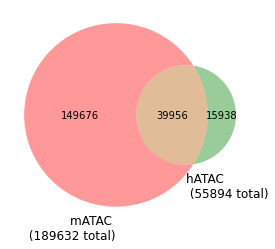

In [45]:
label_count = peak_df.label.value_counts()


v = venn2(subsets=(label_count.mATAC, label_count.hATAC, label_count.both),
           set_labels = (f'mATAC \n ({label_count.mATAC +label_count.both} total)',
                        f'hATAC \n ({label_count.hATAC +label_count.both} total)'))





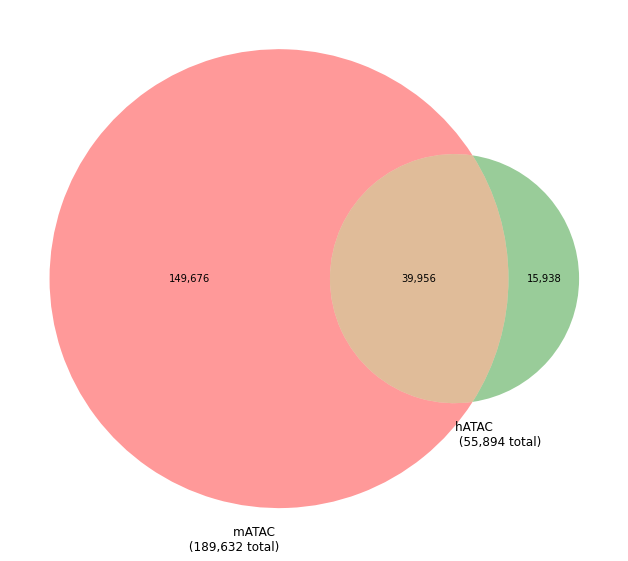

In [47]:
plt.figure(figsize=(16,10))

v = venn2(subsets=(label_count.mATAC, label_count.hATAC, label_count.both), set_labels = (f'mATAC \n (189,632 total)',
                                                                                          f'hATAC \n (55,894 total)'))
v.get_label_by_id('10').set_text('149,676')
v.get_label_by_id('01').set_text('15,938')
v.get_label_by_id('11').set_text('39,956')
plt.savefig('interval_count.png')

## length analysis <a class='anchor' id='length'></a>

the shared amount of BP between hATAC to mATAC

In [51]:
tot_hATAC = (hATAC.TO - hATAC.FROM).sum()
tot_mATAC = (mATAC.TO - mATAC.FROM).sum()
tot_both = (both.TO - both.FROM).sum()


12795955

In [ ]:

v = venn2(subsets=(tot_mATAC - tot_both, tot_hATAC - tot_both, tot_both),
           set_labels = (f'mATAC \n ({tot_mATAC} peaks)',
                        f'hATAC \n ({tot_hATAC} peaks)'))


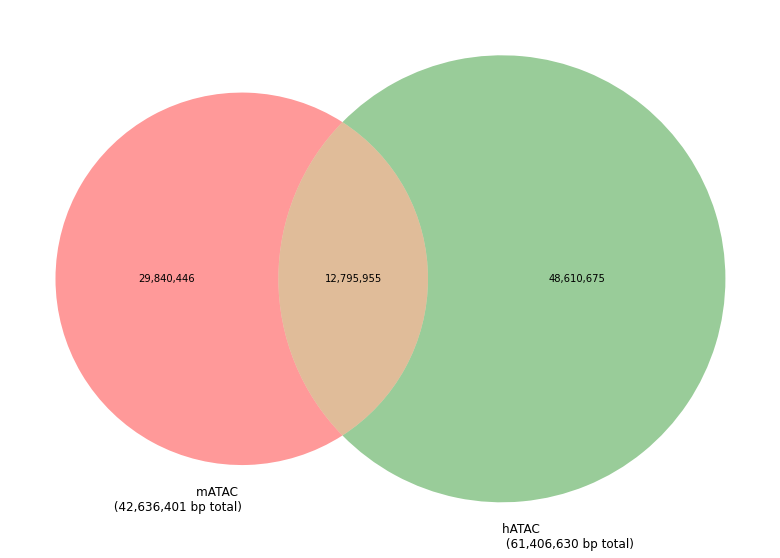

In [54]:
plt.figure(figsize=(16,10))
v = venn2(subsets=(tot_mATAC - tot_both, tot_hATAC - tot_both, tot_both),
           set_labels = (f'mATAC \n (42,636,401 bp total)',
                        f'hATAC \n (61,406,630 bp total)'))
v.get_label_by_id('10').set_text('29,840,446')
v.get_label_by_id('01').set_text('48,610,675')
v.get_label_by_id('11').set_text('12,795,955')
plt.savefig('bp_count.png')